In [19]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')  # change pyplots default style
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [20]:
# mpl.use("pgf")  # to display graphs remove this line
mpl.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
line = 0.75

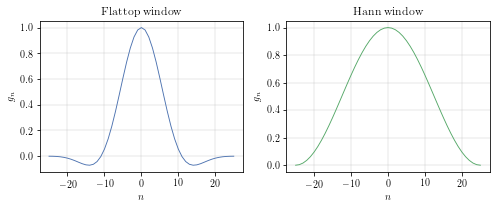

In [21]:
N = 51
n = np.linspace(0, N-1, N)
# flattop = signal.windows.flattop(51)
a = [0.21557895, 0.41663158, 0.277263158, 0.083578947, 0.006947368]
# flattop = a[0] - a[1]*np.cos((2*np.pi*n)/N) + a[2]*np.cos((4*np.pi*n)/N) - a[3]*np.cos((6*np.pi*n)/N) - a[4]*np.cos((8*np.pi*n)/N)
fac = np.linspace(-np.pi, np.pi, N)
flattop = np.zeros(N)
for k in range(len(a)):
    flattop += a[k] * np.cos(k * fac)

# hann = signal.windows.hann(51)
hann = 0.5-0.5*np.cos((2*np.pi*n)/(N-1))
x = np.linspace(-25, 25, 51)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
ax1.plot(x, flattop, '-', linewidth=line * 1.2, color='C0', aa=True)
ax2.plot(x, hann, '-', linewidth=line * 1.2, color='C1', aa=True)
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'$g_n$')
ax1.set_title(r'Flattop window')
ax2.set_xlabel(r'$n$')
ax2.set_ylabel(r'$g_n$')
ax2.set_title(r'Hann window')
ax1.grid(linewidth=0.3)
ax2.grid(linewidth=0.3)
plt.tight_layout()
plt.savefig('out/appe/stft_windows.pgf')

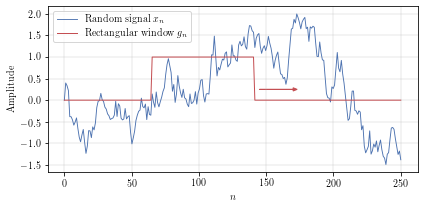

In [22]:
# np.random.seed(6)
# np.random.seed(8)
np.random.seed(11)
def f(x):
    y = 0
    result = []
    for _ in x:
        result.append(y)
        y += np.random.normal(scale=1)
    return np.array(result)


x = np.linspace(0, 250, 250)
y = f(x) 
y /= np.max(y) * 0.5
box = np.linspace(0, 0, 250)
box[65:141] = signal.windows.boxcar(76)

plt.figure(figsize=(6, 3))
plt.plot(x, y, '-', linewidth=line * 1.2, color='C0', aa=True, label=r'Random signal $x_n$')
plt.plot(x, box, '-', linewidth=1, color='C2', aa=True, label=r'Rectangular window $g_n$')
plt.arrow(145,
          0.25,
          25,
          0,
          linestyle='-',
          head_width=0.075,
          head_length=3,
          fc='C2',
          ec='C2',
          alpha=1,
          linewidth=1,
          aa=True)

plt.xlabel(r'$n$')
plt.ylabel(r'Amplitude')
plt.grid(linewidth=0.3)
plt.tight_layout()
plt.legend()
plt.savefig('out/appe/stft_shift.pgf')

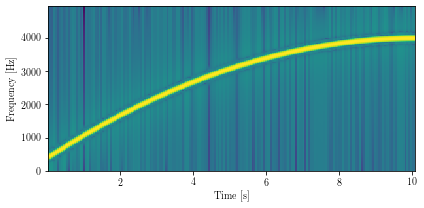

In [23]:
s = 10.1
N = 100000
fs = N/s
t = np.linspace(0, s, N-1)

f1=4000.0
f0=400.0
t1=s

sig = np.cos(2*np.pi*(f1*t + ((f1-f0)*(t1-t)**3-t1**3)/(3*t1**2)))

f, t, x = signal.spectrogram(sig,
                             fs,
                             return_onesided=True,
                             window='flattop',
                             nperseg=512,
                             nfft=512,
                             noverlap=0,
                             detrend=False,
                             scaling='density',
                             mode='psd')
x = ss.util.dB_power(x)
plt.figure(figsize=(6, 3))
plt.pcolormesh(t, f, x, cmap='viridis', vmin=np.min(x), vmax=np.max(x))
plt.xlabel('Time $[\mathrm{s}]$')
plt.ylabel('Frequency $[\mathrm{Hz}]$')
plt.tight_layout()
plt.savefig('out/appe/stft_spec.png', dpi=800)

# 10 seconds
# 1e5 samples
# 1e4 fs